In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
from skimage.transform import resize

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec

In [2]:
folder = '/mnt/e/MLTrainingImages'
facies = []
ftypes = []

for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith('.npy'):
            fullfile = os.path.join(root, file)
            ftype = fullfile.split('/')[4:6]
            if ftype[0] == 'ProFluvsim' or ftype[0] == 'Turbsim':
                ftype = ftype[0]
            else:
                ftype = '-'.join(ftype)
            ftypes.append(ftype)
            d = np.load(fullfile).reshape(256,256,128)
            d_ = resize(d, (64,64,16))
            facies.append(d_)

In [3]:
facies_arr = np.array(facies)
ftypes_arr = np.array(ftypes)
print(facies_arr.shape, ftypes_arr.shape)

(318, 64, 64, 16) (318,)


In [4]:
pca = PCA(n_components=2)
z_pca = pca.fit_transform(facies_arr.reshape(318,-1))

class_map = {k: v for v, k in enumerate(np.unique(ftypes_arr))}
ftype_class = np.array([class_map[ftype] for ftype in ftypes_arr])

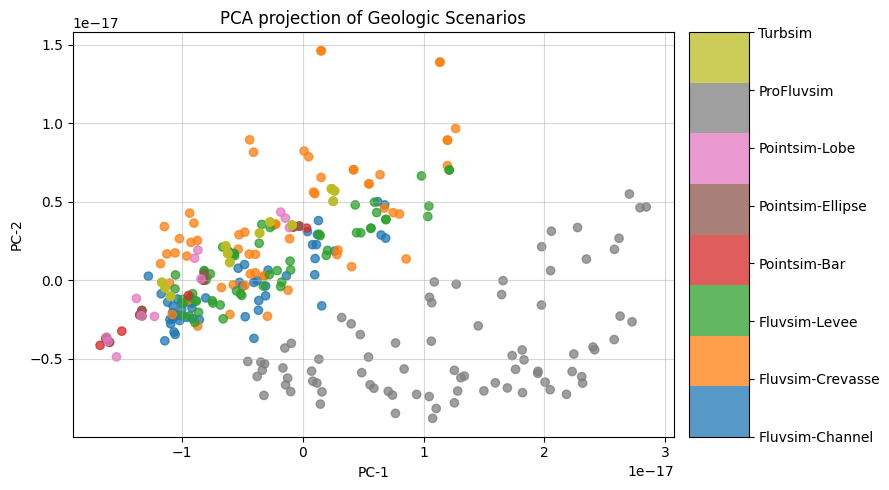

In [5]:
my_jet_cmap = ListedColormap(plt.cm.tab10(np.arange(len(class_map))/len(class_map)))

fig = plt.figure(figsize=(9,5))
gs = GridSpec(8, 2, figure=fig, width_ratios=[1, 0.1])

ax1 = fig.add_subplot(gs[:, 0])
cax = fig.add_subplot(gs[:, 1])

im = ax1.scatter(z_pca[:,0], z_pca[:,1], c=ftype_class, alpha=0.75, cmap=my_jet_cmap)
ax1.set(xlabel='PC-1', ylabel='PC-2', title='PCA projection of Geologic Scenarios')
cb = fig.colorbar(im, cax=cax, orientation='vertical')
cb.set_ticks(np.arange(len(class_map)))
cb.set_ticklabels(list(class_map.keys()))
ax1.grid(True, which='both', alpha=0.5)

plt.tight_layout()
plt.show()

In [6]:
locs = []
for i in range(8):
    locs.append(np.argwhere(ftype_class == i).shape[0])
print(locs)
print(np.cumsum(locs))

[53, 61, 54, 11, 11, 12, 80, 36]
[ 53 114 168 179 190 202 282 318]


In [10]:
print([l*4 for l in locs])

[212, 244, 216, 44, 44, 48, 320, 144]


In [7]:
filenames = []
for root, dirs, files in os.walk(folder):
    for file in files:
        if file.endswith('.npy'):
            fullfile = os.path.join(root, file)
            filenames.append(fullfile)

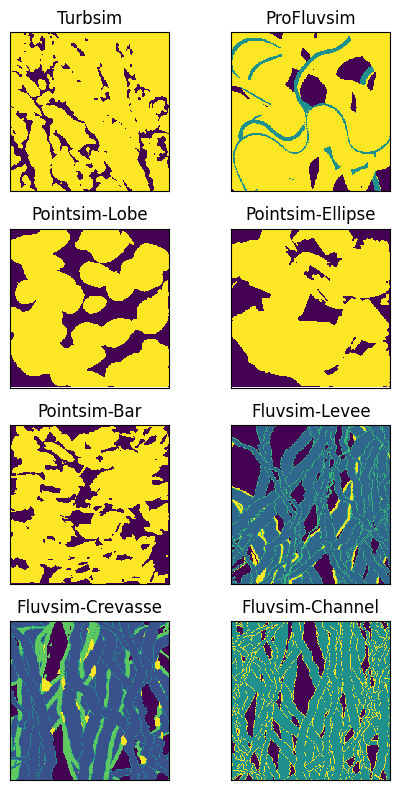

In [8]:
layer = 64
plt.figure(figsize=(5,8))
for i in range(8):
    d = np.load(filenames[np.cumsum(locs)[::-1][i]-1]).reshape(256,256,128)
    plt.subplot(4,2,i+1)
    plt.imshow(d[:,:,layer], cmap='viridis', interpolation='none')
    plt.xticks([]); plt.yticks([])
    plt.title(list(class_map.keys())[::-1][i])
plt.tight_layout()
plt.show()